In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from iit_tpm import make_tpm, tpm_series
from grn_tpm import iit_tpm_cal

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)

def serie_plot(bnet, w, k, steps, seeds=1, name=''):
    tpm, tpm_v = make_tpm(bnet, w=w, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2)   
    colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500']
    strs = [decimal_to_binary(i, min_length=3) for i in range(8)]
    for init_state in strs:
        fig, ax = plt.subplots(figsize=(10,4),dpi=150)
        for indx,en in enumerate(["00", "01", "10", "11"]):
            en_state = en
            for seed in range(seeds):
                serie, serie_str = tpm_series(tpm_dic[en_state], init_state, steps, seed)

                # 由于二进制字符串不能直接作为y轴的值，我们可以使用它们的索引作为y轴的值
                ax.scatter(range(steps+1), serie, label='en_state:'+en_state, color=colors[indx])

        # 设置轴标签
        ax.set_xlabel('Time')
        ax.set_ylabel('System state')

        # 设置y轴的标签
        ax.set_yticks(range(8))
        ax.set_yticklabels(strs)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
        plt.title(name + '_init=' + init_state + '_syn=' + str(syn))
        # 显示图形
        plt.show()
        
    return un_sys, un_en, syn

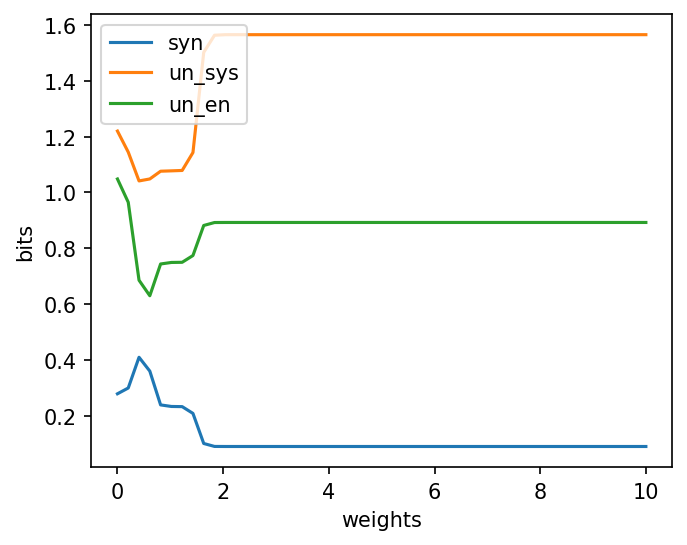

In [21]:
w=0
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': w,
    'w_ca': 0,
    'w_bc': w,
    'w_cb': 0,
    'w_a': 0.5,
    'w_b': 0.5,
    'w_c': 0.5,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.5,
    'w2b': 0.5,
    'w2c': 0.5
}

bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w1a',
    ('E1', 'B'): 'w1b',
    ('E1', 'C'): 'w1c',
    ('E2', 'A'): 'w2a',
    ('E2', 'B'): 'w2b',
    ('E2', 'C'): 'w2c',
}

syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 10, 50)
for w in w_axis:
    ww['w_ab'] = w
    ww['w_bc'] = w
    ww['w_ac'] = w
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
plt.plot(w_axis, un_sys_list, label="un_sys")
plt.plot(w_axis, un_en_list, label="un_en")
plt.xlabel('weights')
plt.ylabel('bits')
plt.legend()

# 不同环境状态下系统演化序列比较

In [10]:
# w1 = {
#     'w1': 0.9,
#     'w2': 0.9,
#     'w3': 0.9,
#     'w4': 0.8,
#     'w5': -0.01,
#     'w6': -0.01
# }

# w2 = {
#     'w1': 0.05,
#     'w2': 0.05,
#     'w3': 0.05,
#     'w4': 0,
#     'w5': -0.9,
#     'w6': -0.9
# }
w=0
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': w,
    'w_bc': w,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.5,
    'w2b': 0.5,
    'w2c': 0.5
}

bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w1a',
    ('E1', 'B'): 'w1b',
    ('E1', 'C'): 'w1c',
    ('E2', 'A'): 'w2a',
    ('E2', 'B'): 'w2b',
    ('E2', 'C'): 'w2c',
}


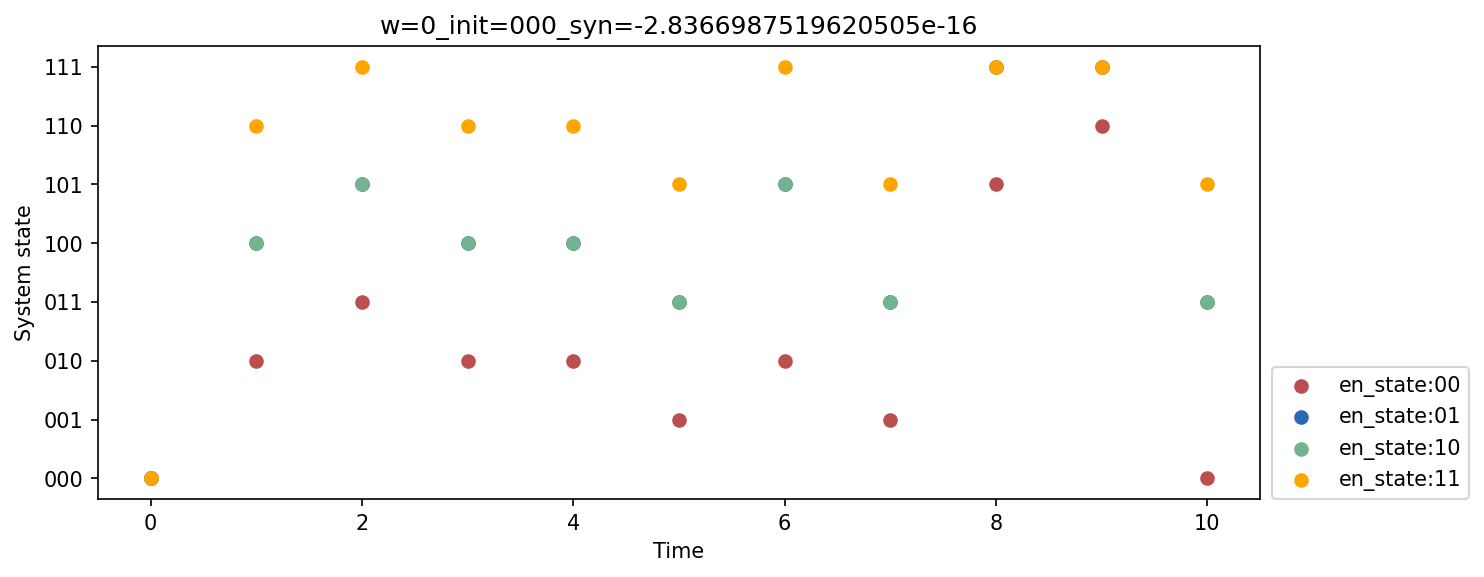

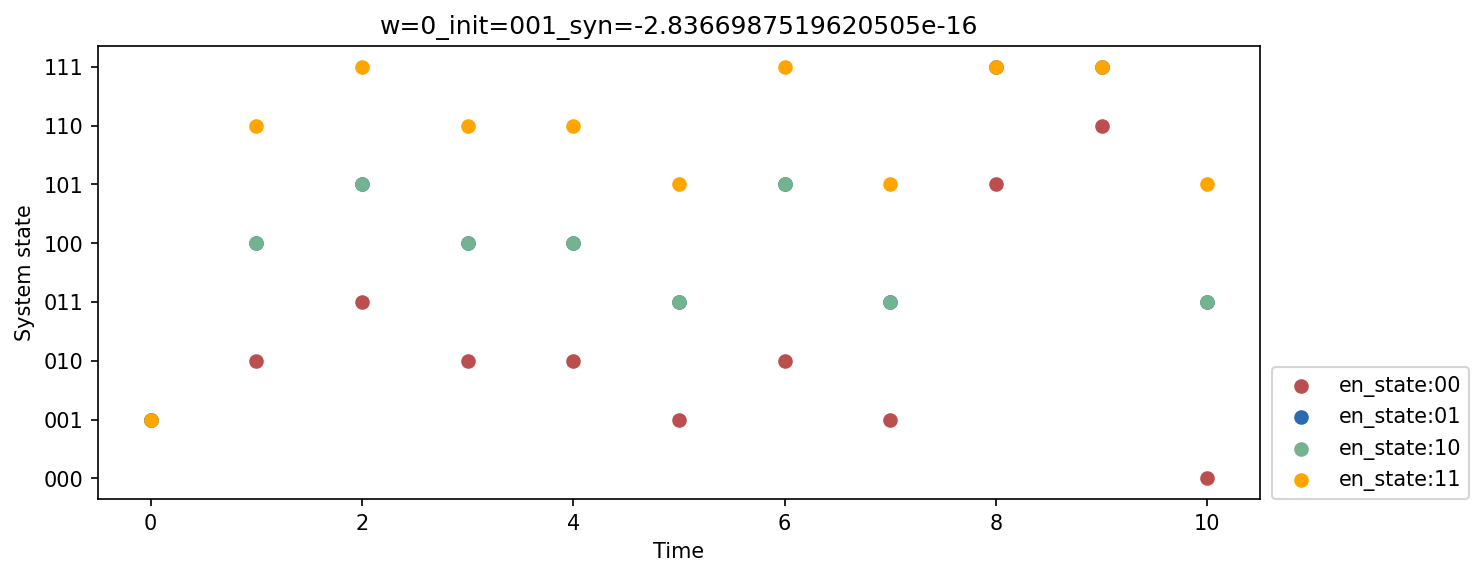

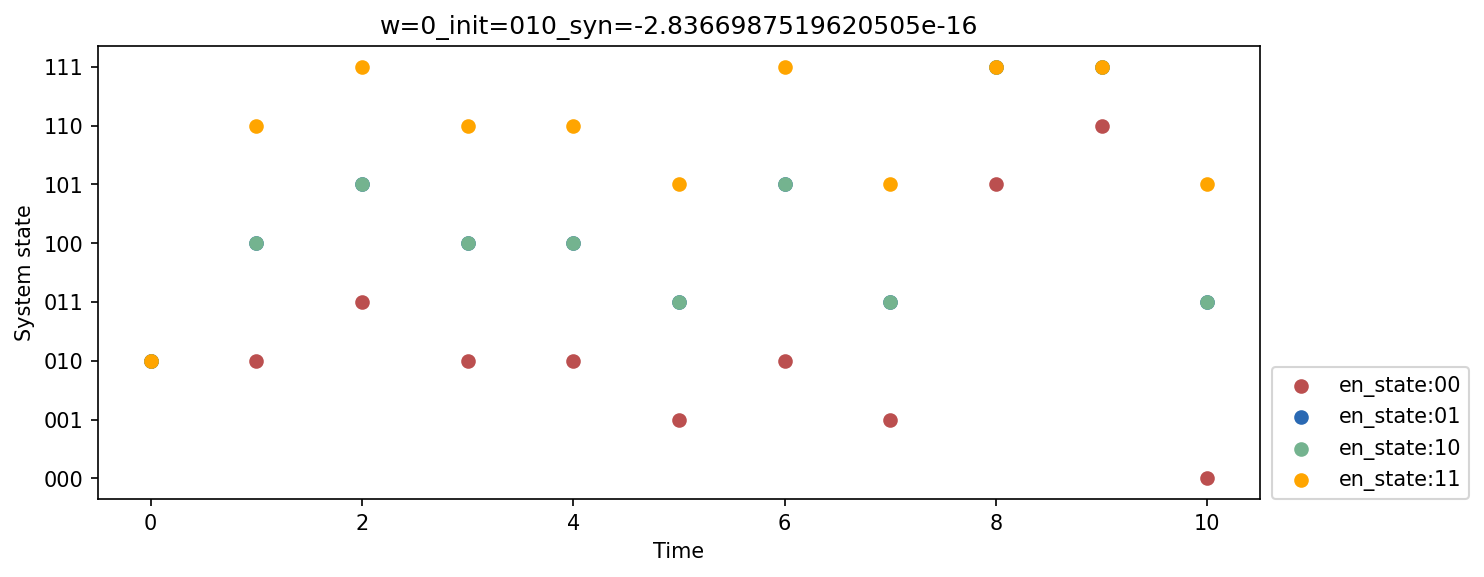

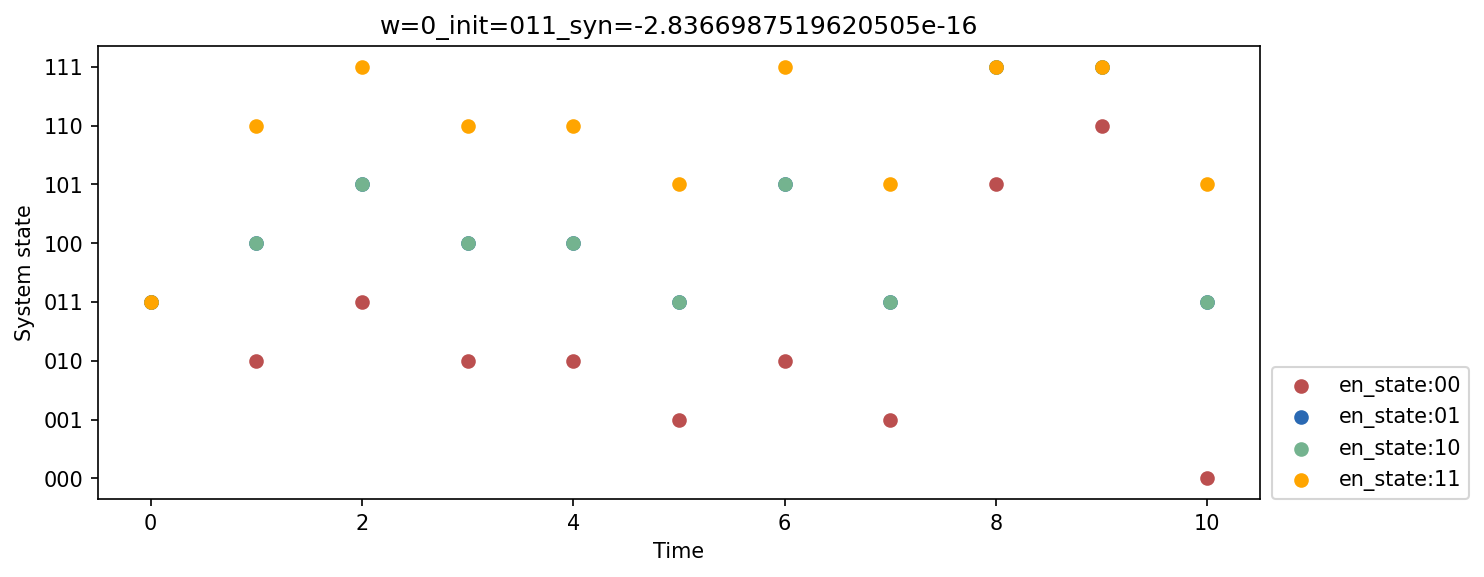

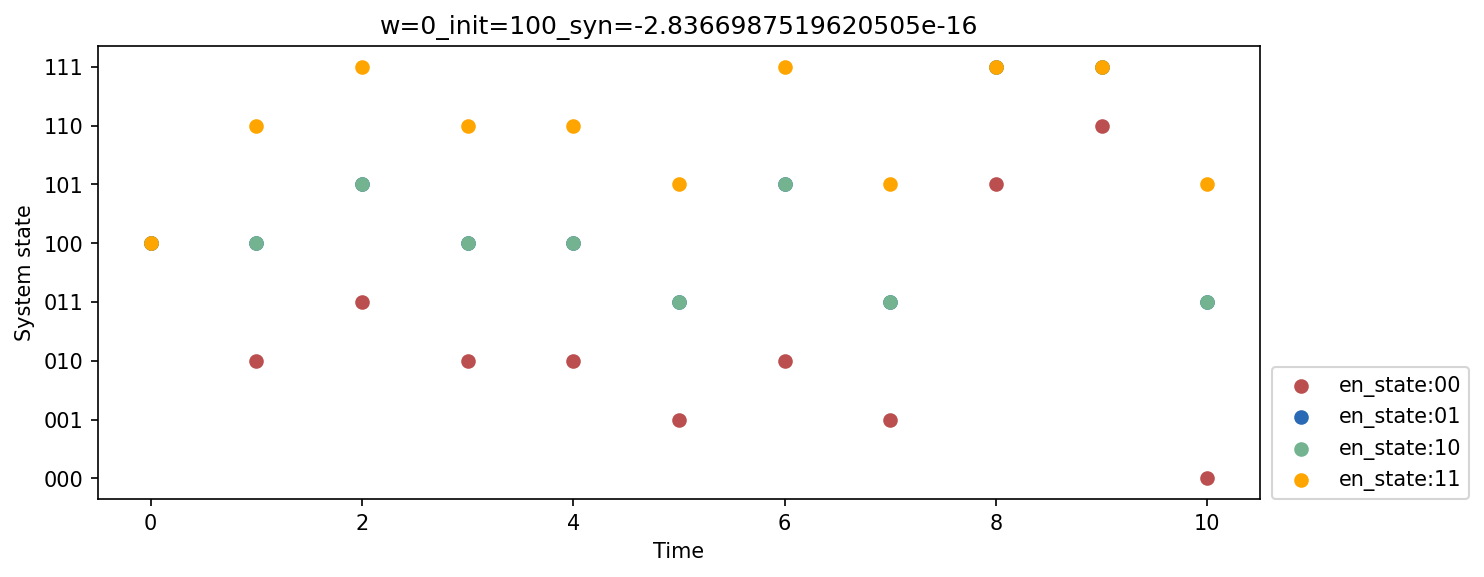

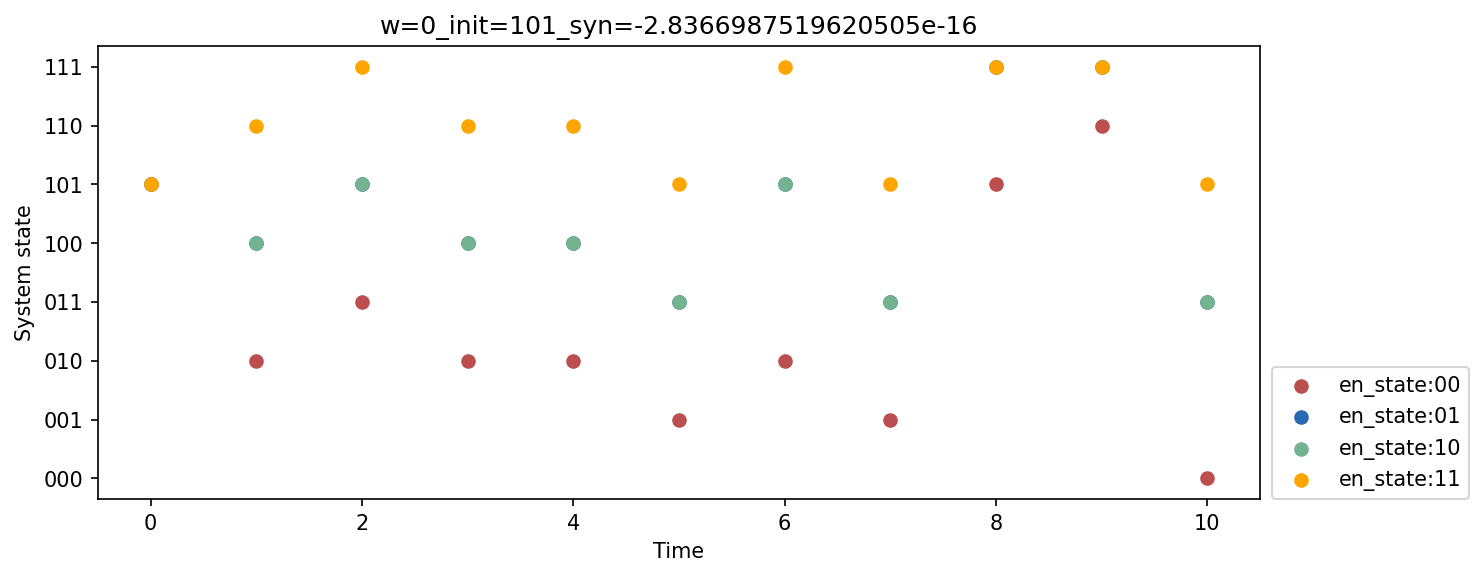

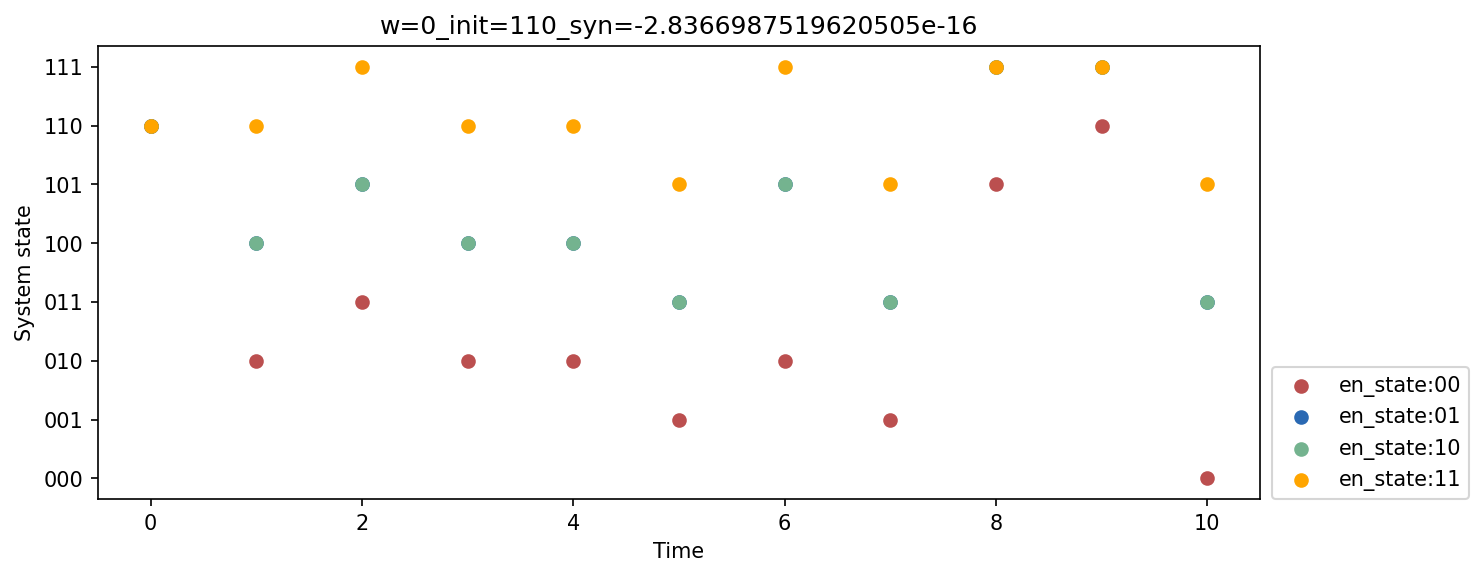

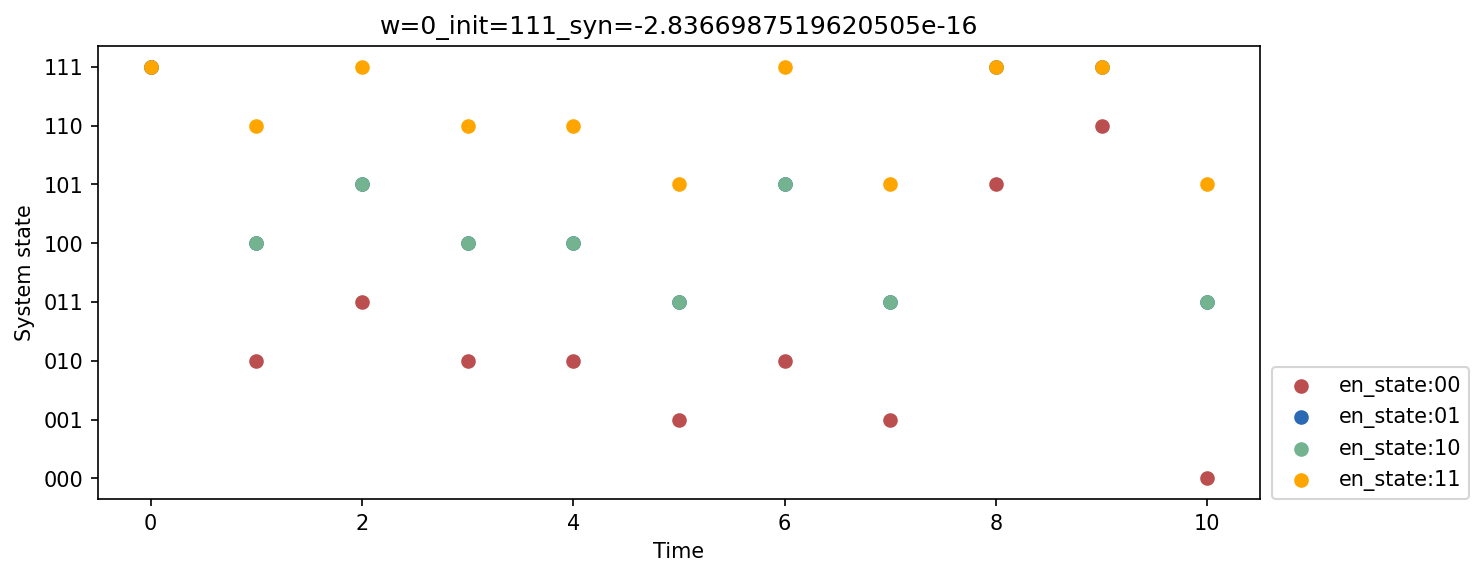

(2.1460327557986725e-16, 0.2168926749645675, -2.8366987519620505e-16)

In [17]:
steps = 10
k=1
w=0
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': w,
    'w_bc': w,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.5,
    'w2b': 0.5,
    'w2c': 0.5
}
serie_plot(bnet, w=ww, k=k, steps=steps, seeds=1, name='w=0')


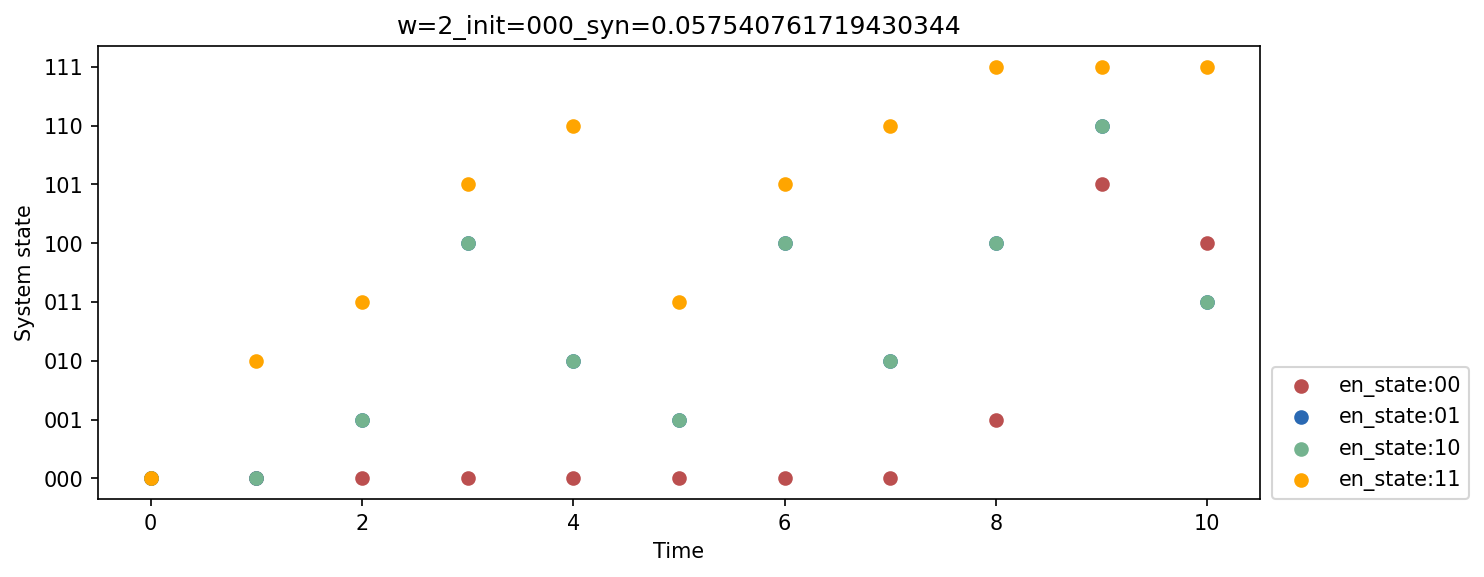

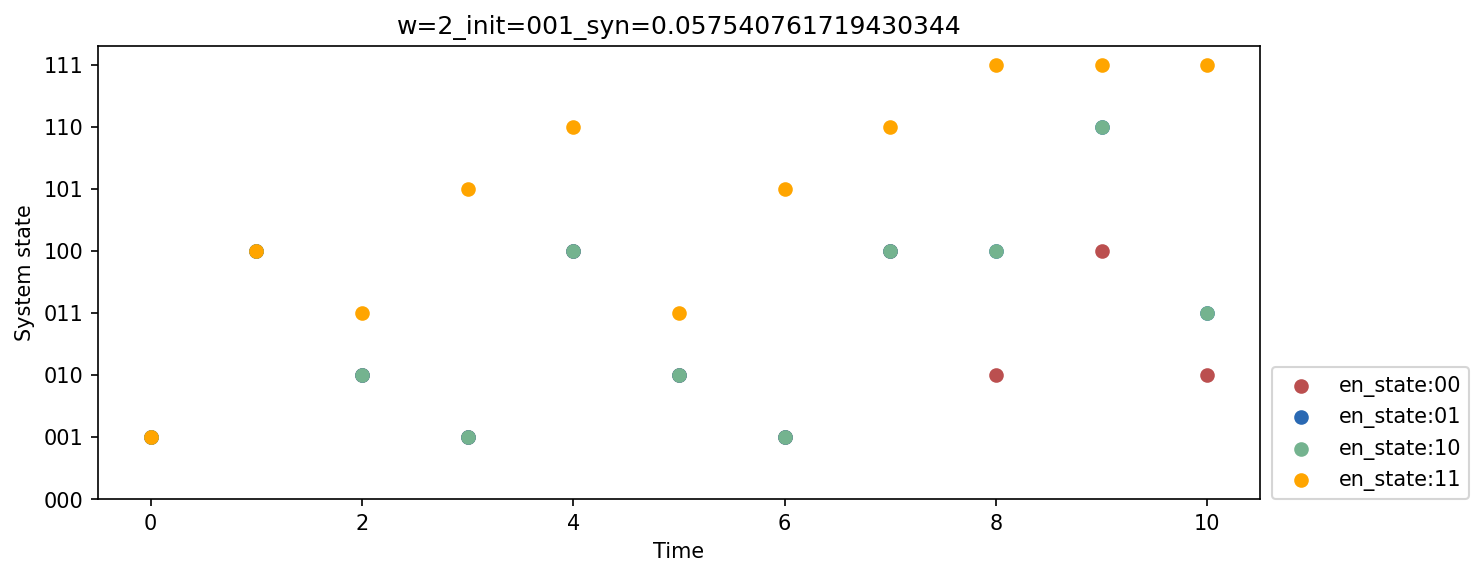

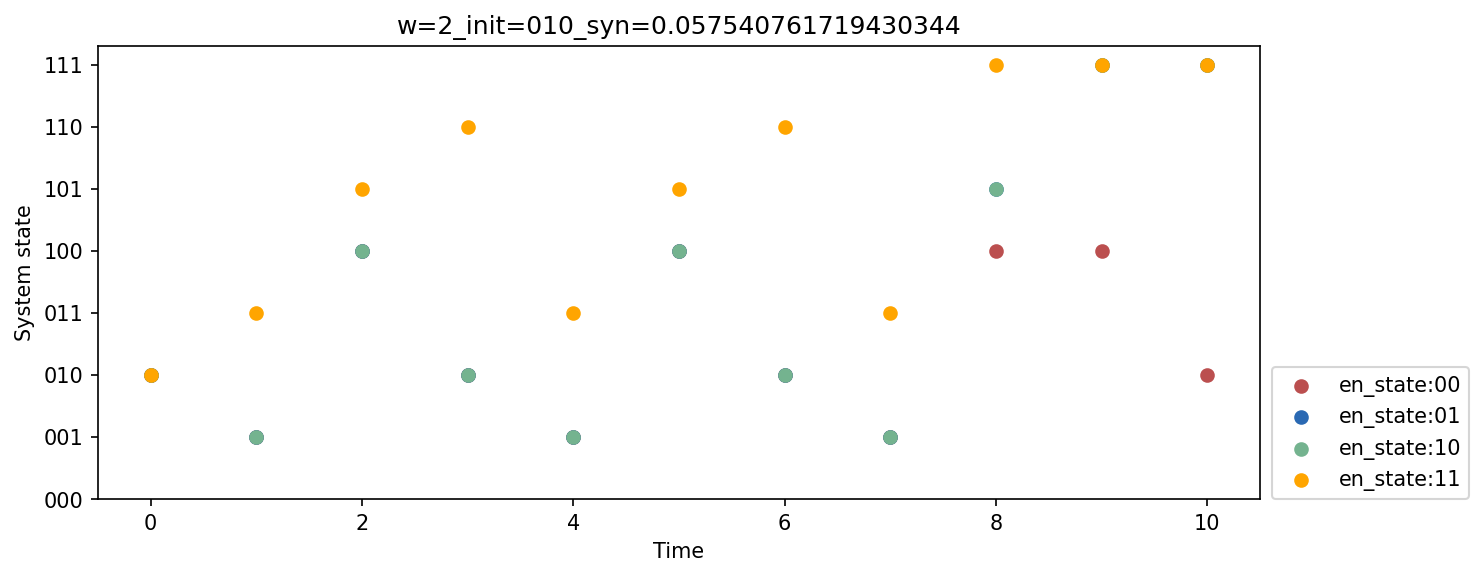

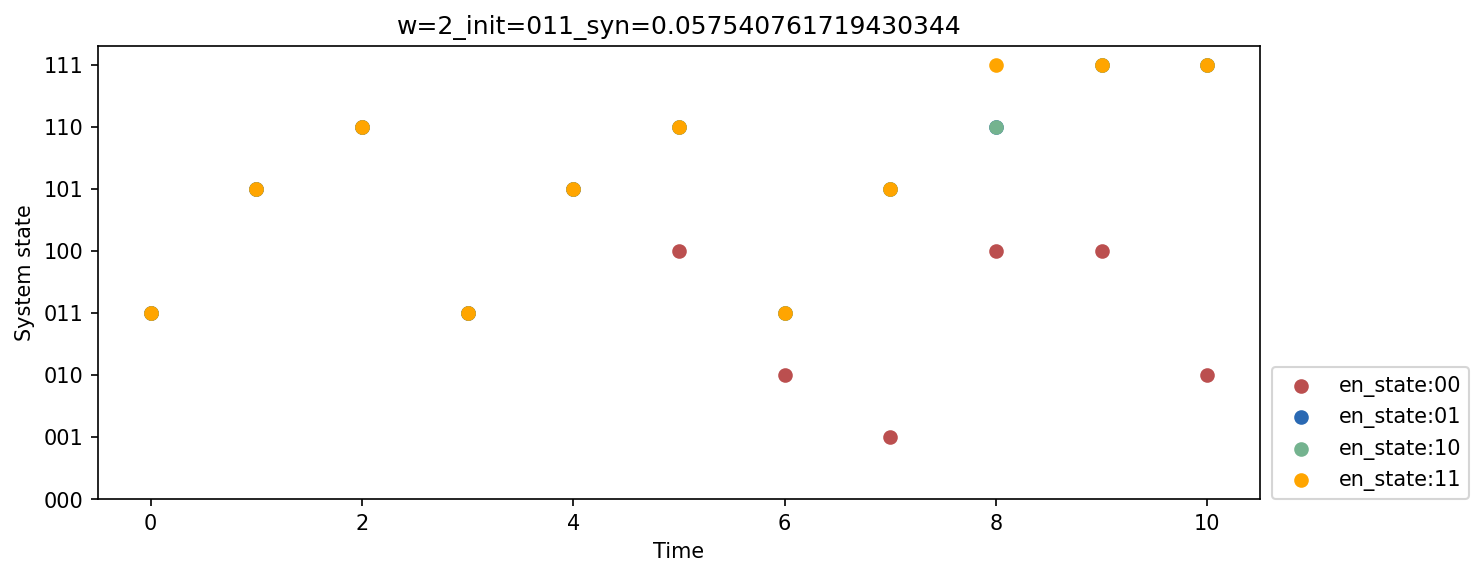

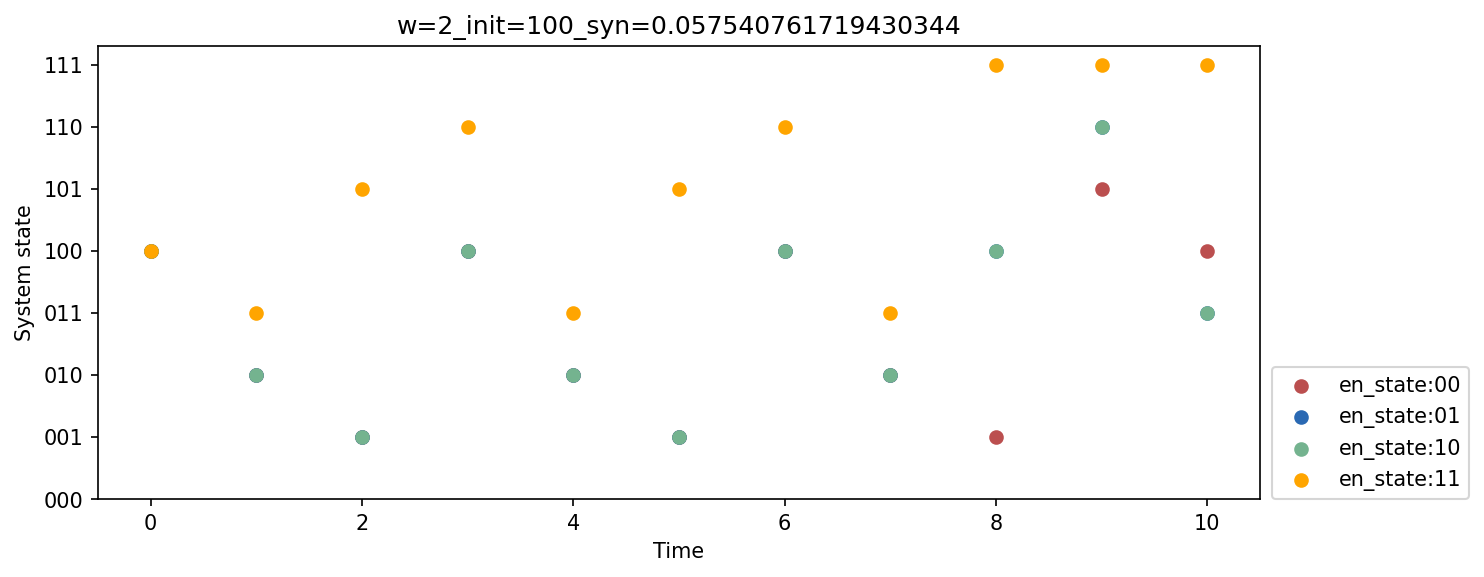

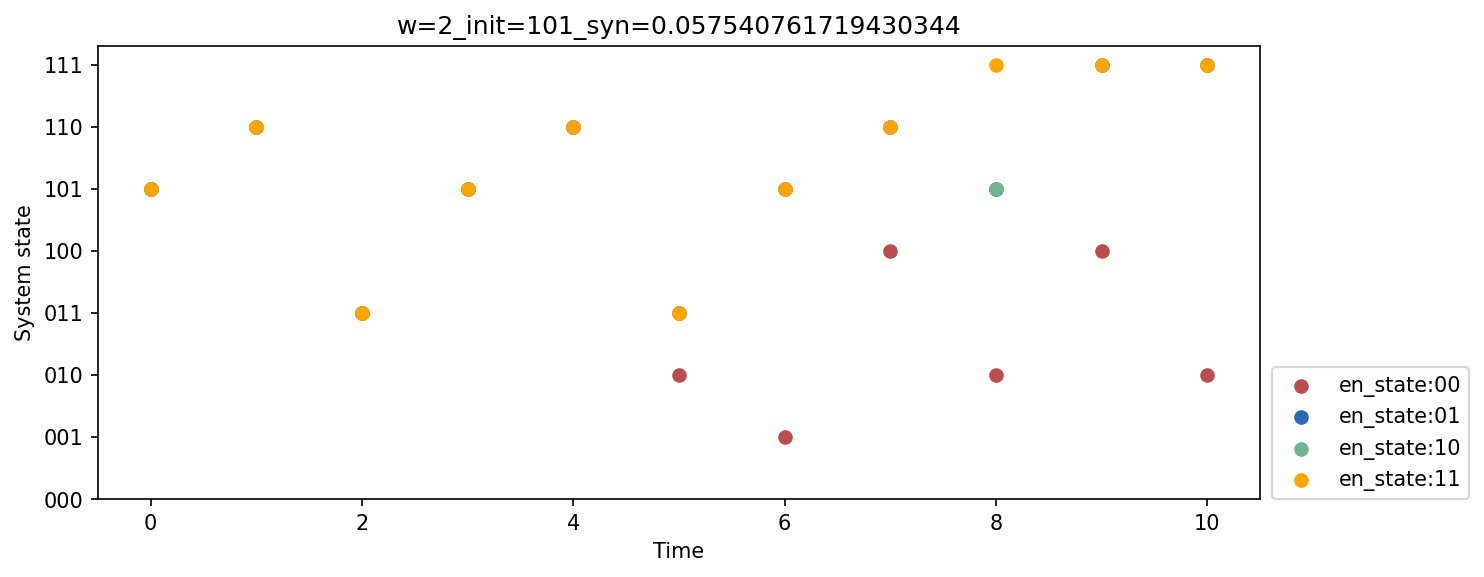

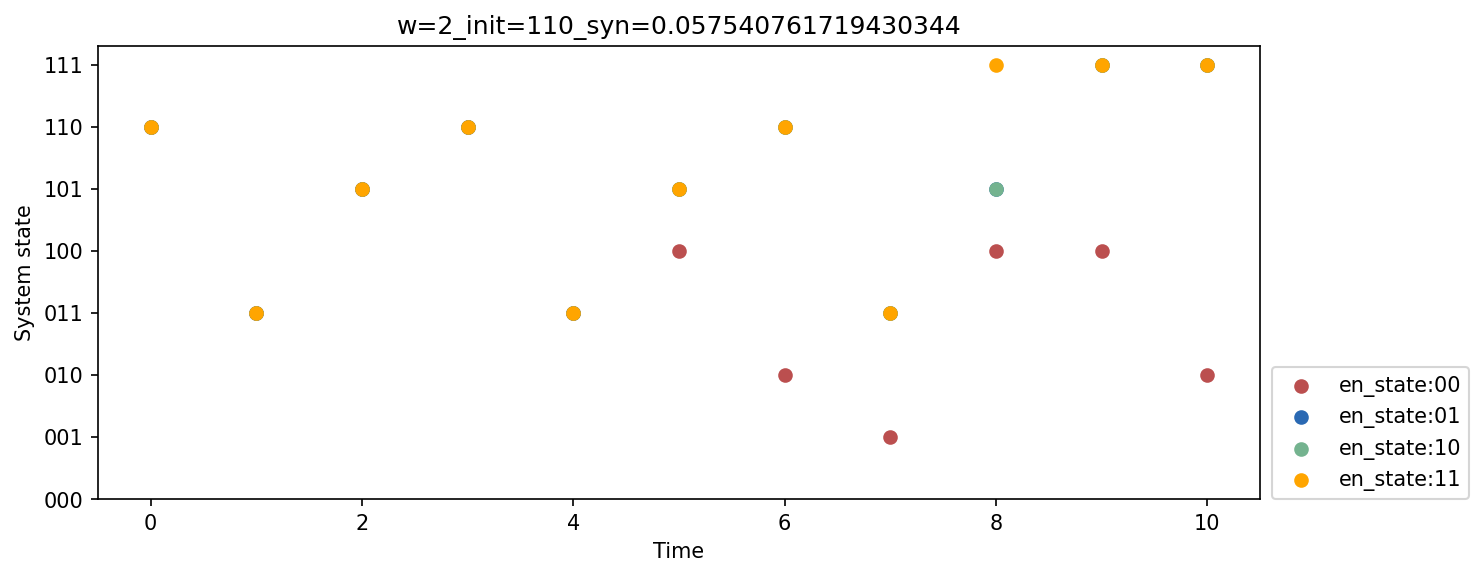

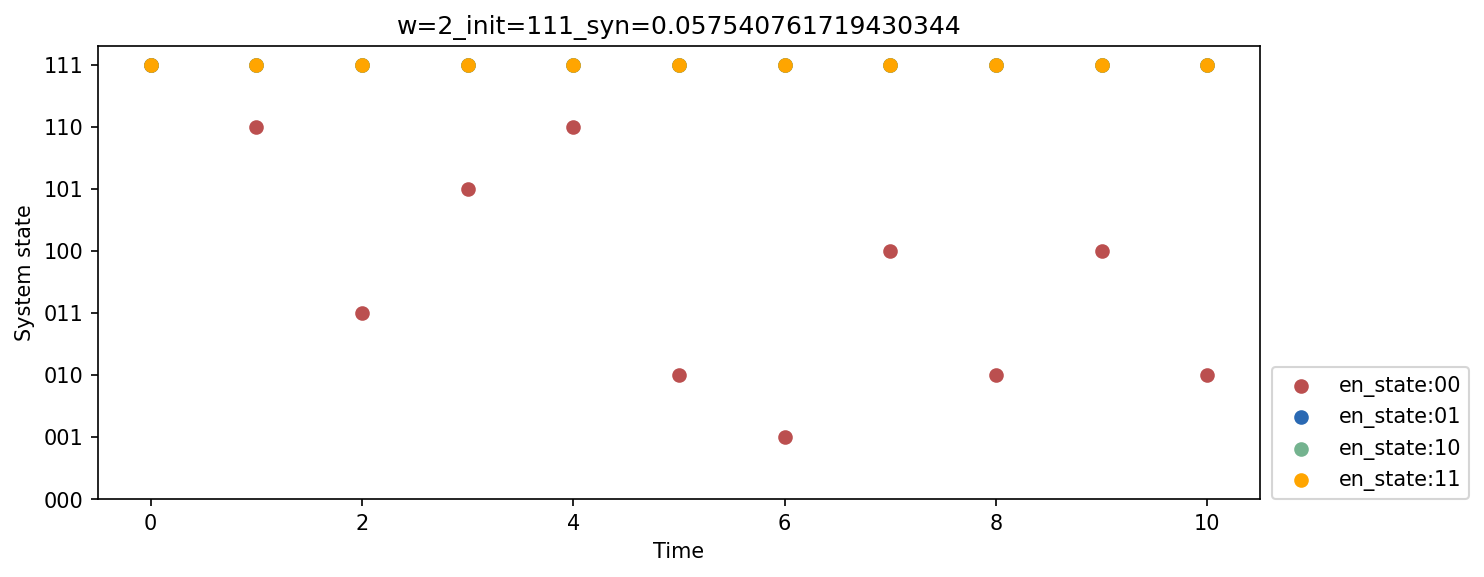

(1.2618482959238022, 0.05225461036431993, 0.057540761719430344)

In [16]:
steps = 10
k=1
w=2
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': w,
    'w_bc': w,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.5,
    'w2b': 0.5,
    'w2c': 0.5
}
serie_plot(bnet, w=ww, k=k, steps=steps, seeds=1, name='w=2')

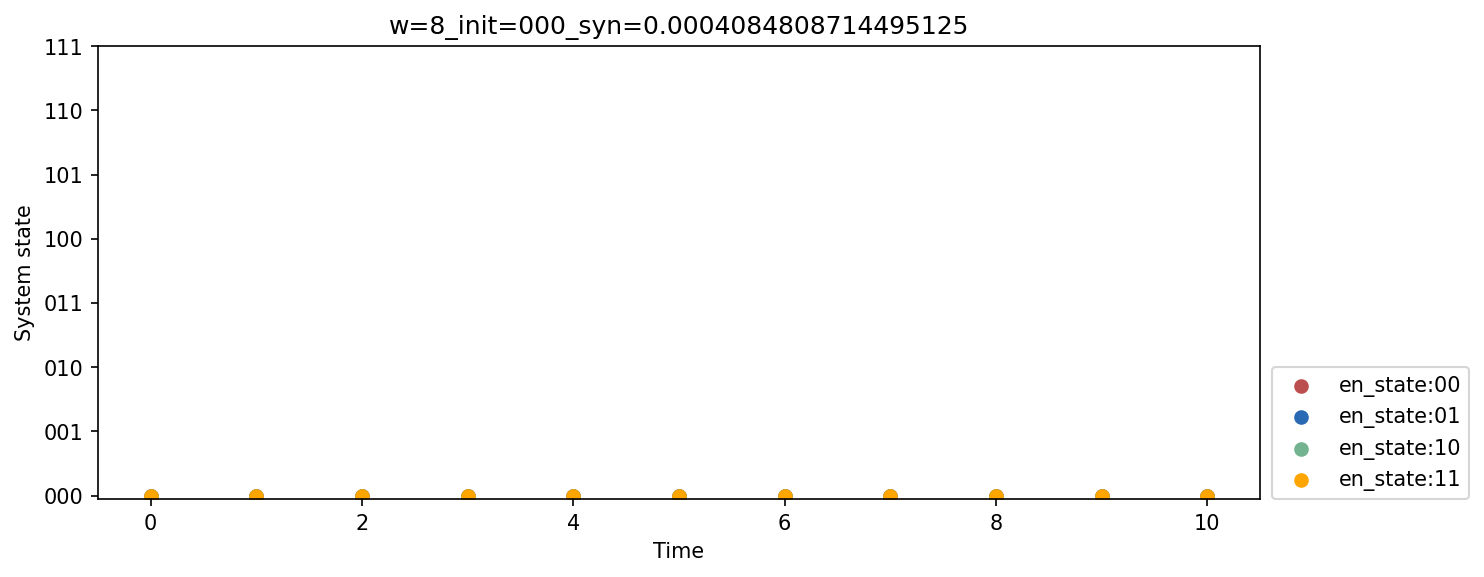

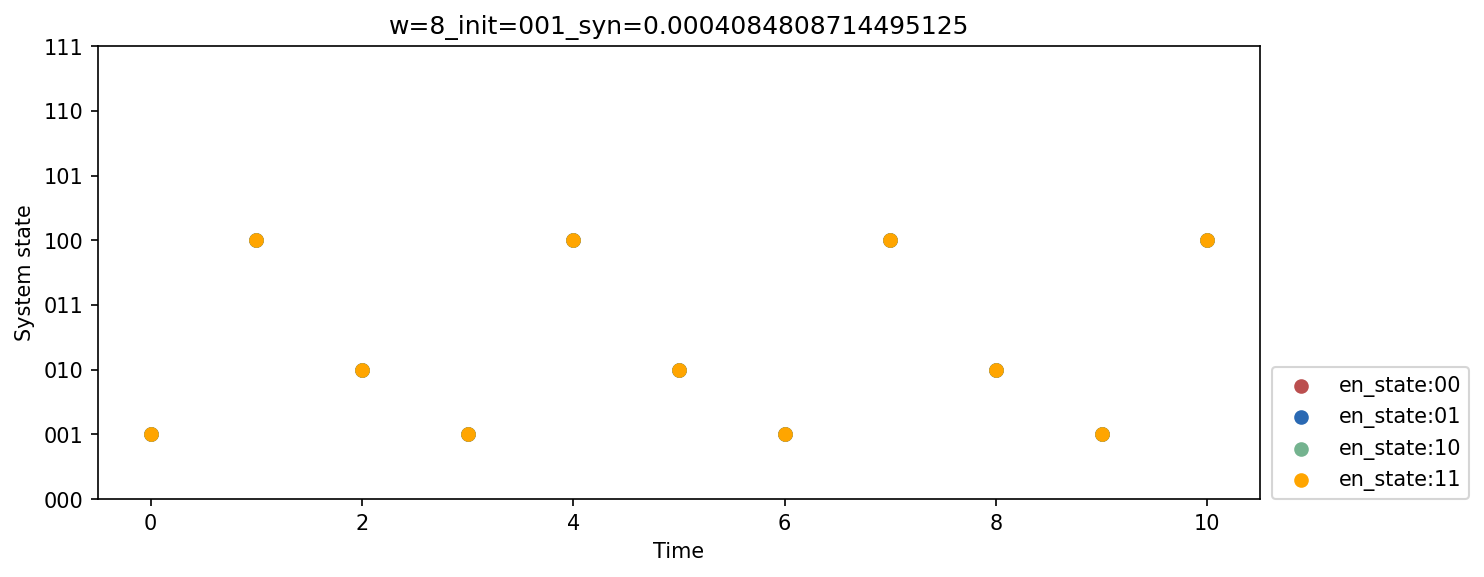

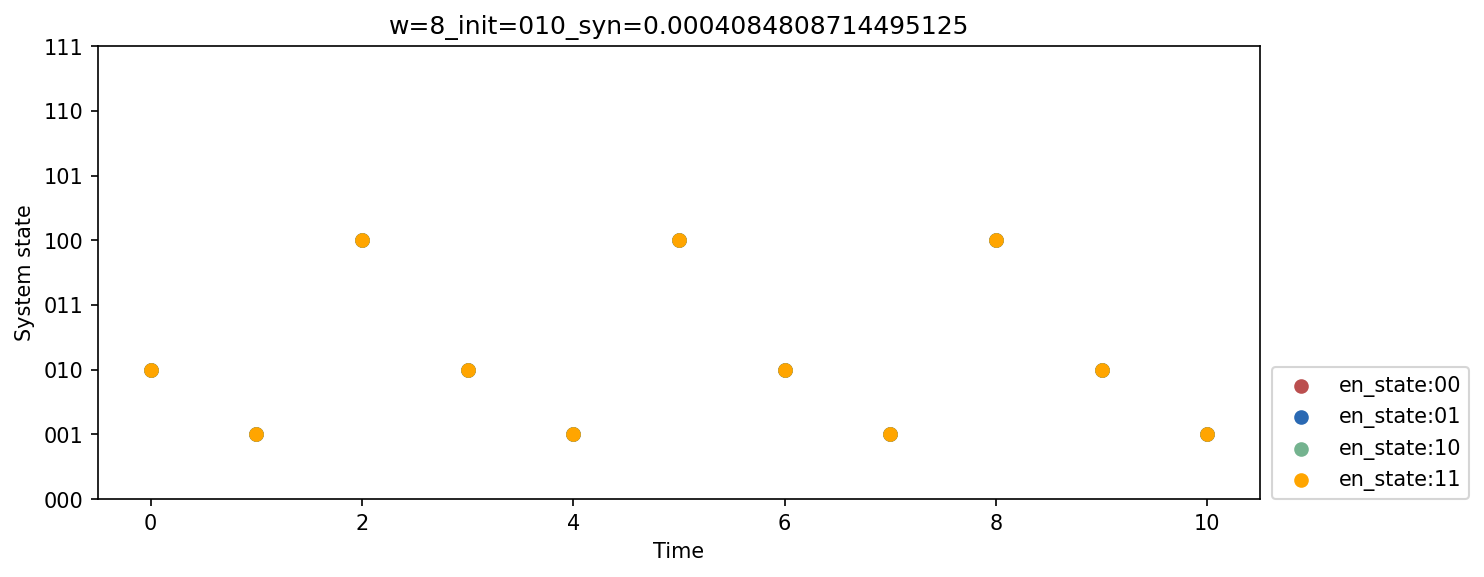

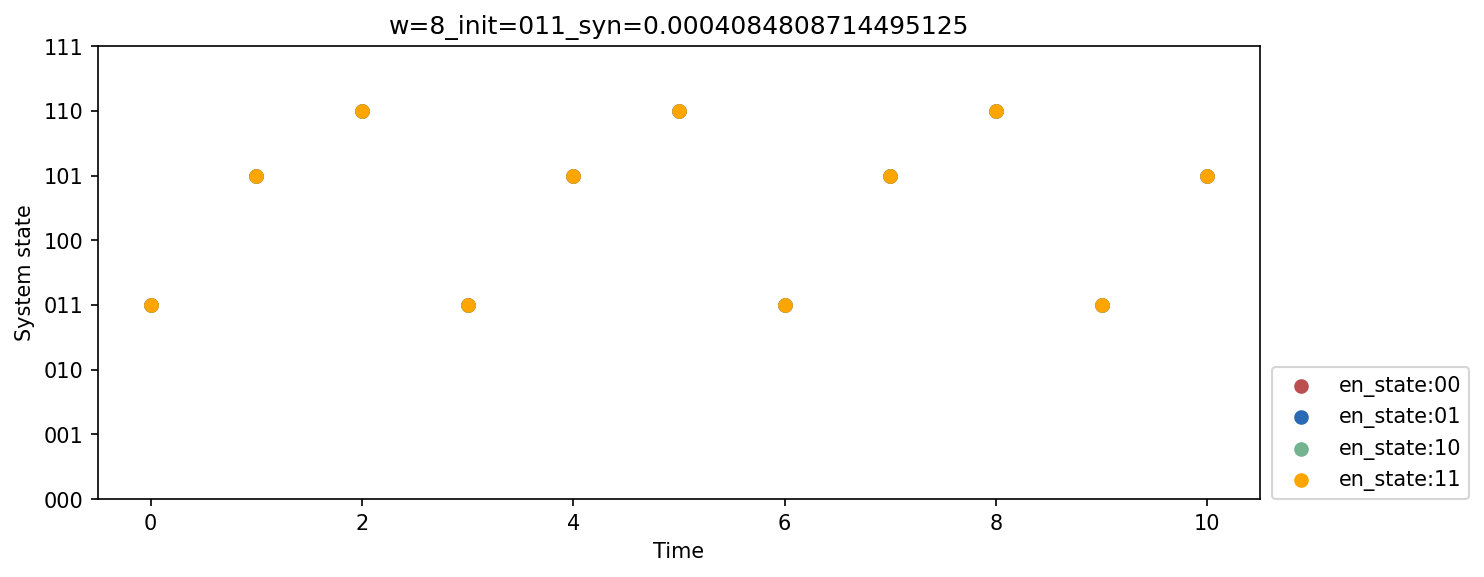

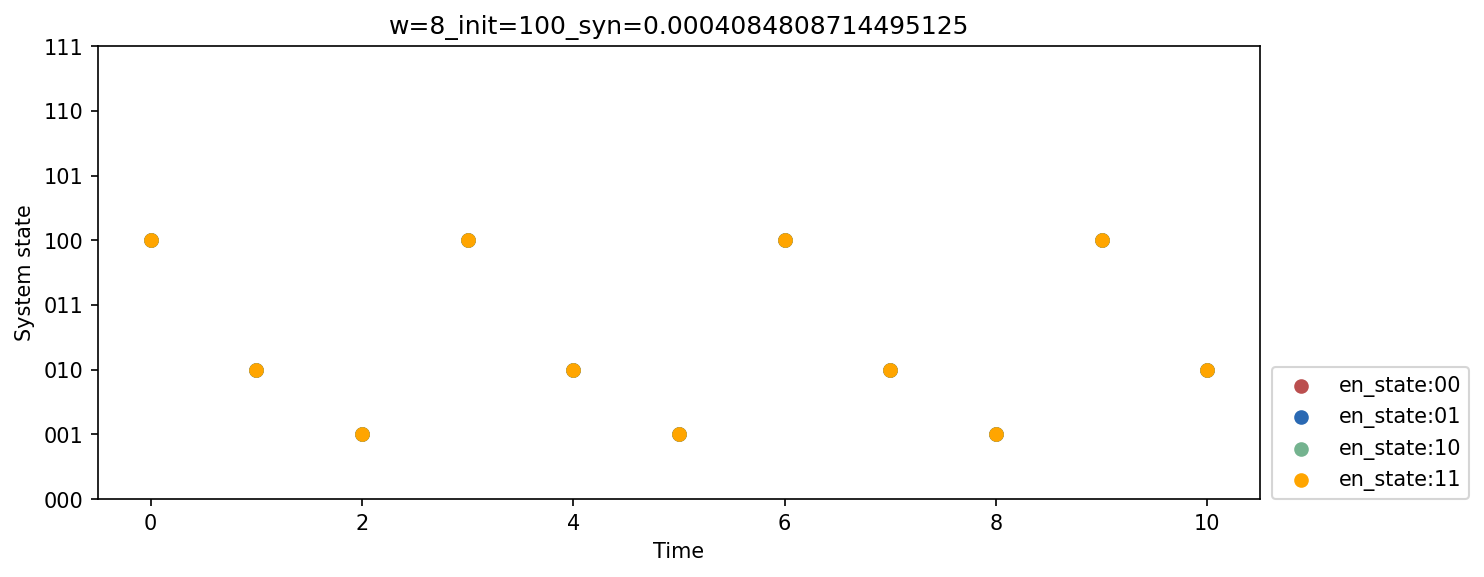

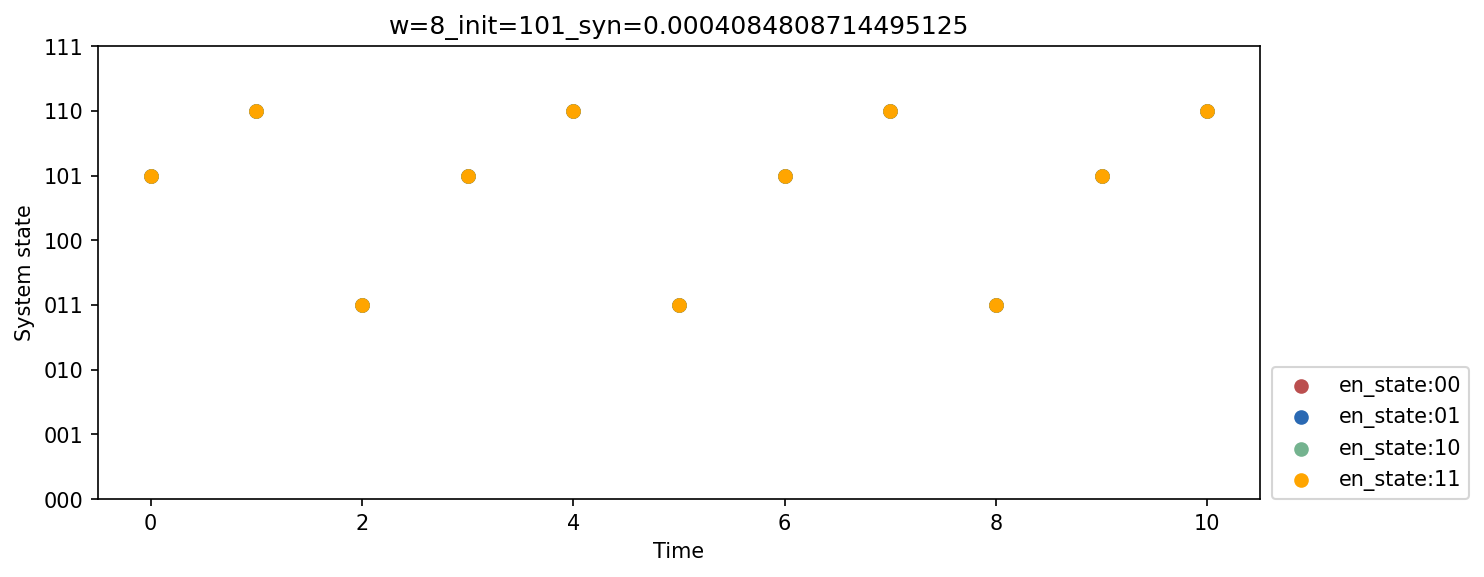

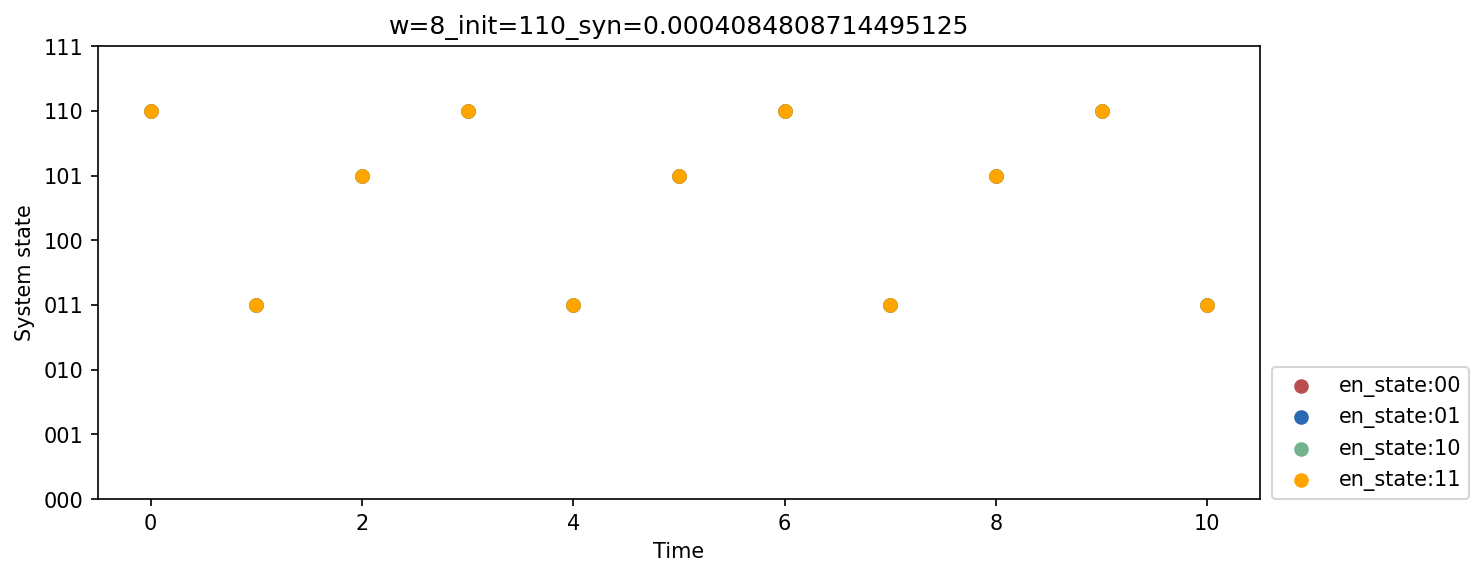

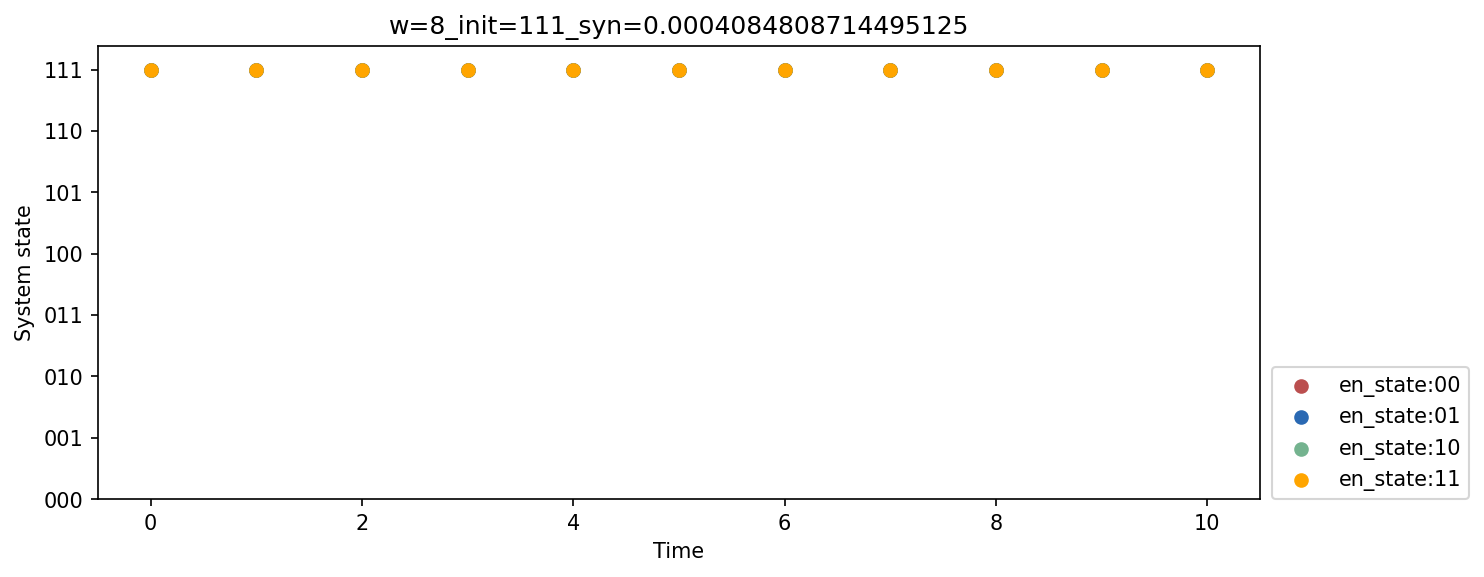

(2.9838374911607635, 6.712890540116206e-07, 0.0004084808714495125)

In [18]:
steps = 10
k=1
w=8
ww = {
    'w_ab': w,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': w,
    'w_bc': w,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w1a': 0.5,
    'w1b': 0.5,
    'w1c': 0.5,
    'w2a': 0.5,
    'w2b': 0.5,
    'w2c': 0.5
}
serie_plot(bnet, w=ww, k=k, steps=steps, seeds=1, name='w=8')

# 最佳噪音实验复现

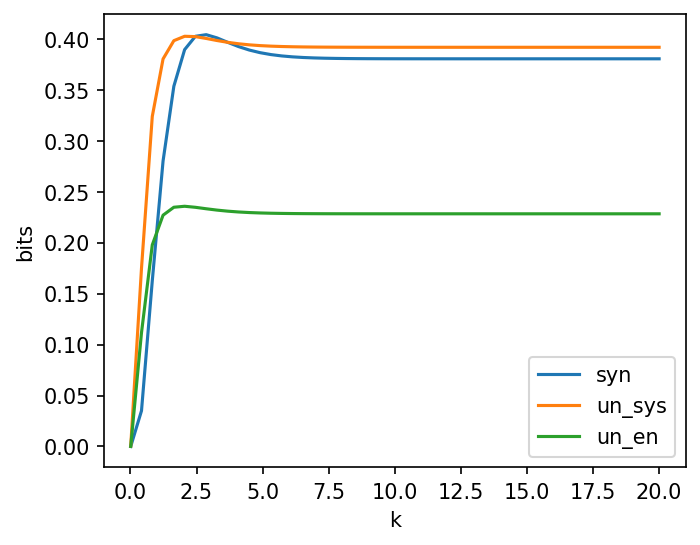

In [19]:
ww = {
    'w_ab': 1,
    'w_ba': 1,
    'w_ac': 1,
    'w_ca': 1,
    'w_bc': 1,
    'w_cb': 1,
    'w_a': 1,
    'w_b': 1,
    'w_c': 1,
    'w1a': 1,
    'w1b': 1,
    'w1c': 1,
    'w2a': 1,
    'w2b': 1,
    'w2c': 1
}

bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w1a',
    ('E1', 'B'): 'w1b',
    ('E1', 'C'): 'w1c',
    ('E2', 'A'): 'w2a',
    ('E2', 'B'): 'w2b',
    ('E2', 'C'): 'w2c',
}

syn_list = []
un_sys_list = []
un_en_list = []
k_axis = np.linspace(0.01, 20, 50)
for k in k_axis:
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(k_axis, syn_list, label='syn')
plt.plot(k_axis, un_sys_list, label="un_sys")
plt.plot(k_axis, un_en_list, label="un_en")
plt.xlabel('k')
plt.ylabel('bits')
plt.legend()

# plt.figure(figsize=(5,4),dpi=150)
# plt.plot(k_axis, un_sys_list)
# plt.xlabel('k')
# plt.ylabel('un')
#un_sys, un_en, syn = serie_plot(bnet, w, k, steps, seeds=1)

# 不同系统结构应对环境变化

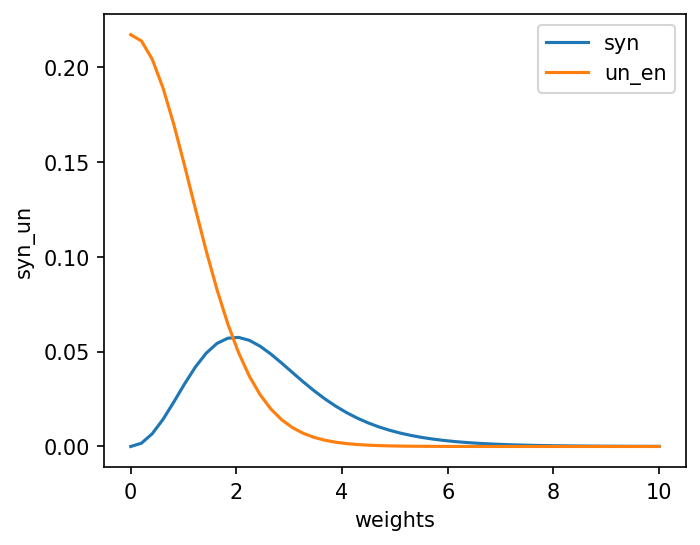

In [9]:
k = 1

ww = {
    'w_ab': 0,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': 0,
    'w_bc': 0,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w11': 0.5,
    'w12': 0.5,
    'w13': 0.5,
    'w21': 0.5,
    'w22': 0.5,
    'w23': 0.5
}

bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w11',
    ('E1', 'B'): 'w12',
    ('E1', 'C'): 'w13',
    ('E2', 'A'): 'w21',
    ('E2', 'B'): 'w22',
    ('E2', 'C'): 'w23',
}

syn_list = []
un_sys_list = []
un_en_list = []
w_axis = np.linspace(0, 10, 50)
for w in w_axis:
    ww['w_ab'] = w
    ww['w_bc'] = w
    ww['w_ca'] = w
    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    un_sys_list.append(un_sys)
    un_en_list.append(un_en)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list, label='syn')
#plt.plot(w_axis, un_sys_list, label="un_sys")
plt.plot(w_axis, un_en_list, label="un_en")
plt.xlabel('weights')
plt.ylabel('syn_un')
plt.legend()
#un_sys, un_en, syn = serie_plot(bnet, w, k, steps, seeds=1)

Text(0, 0.5, 'syn')

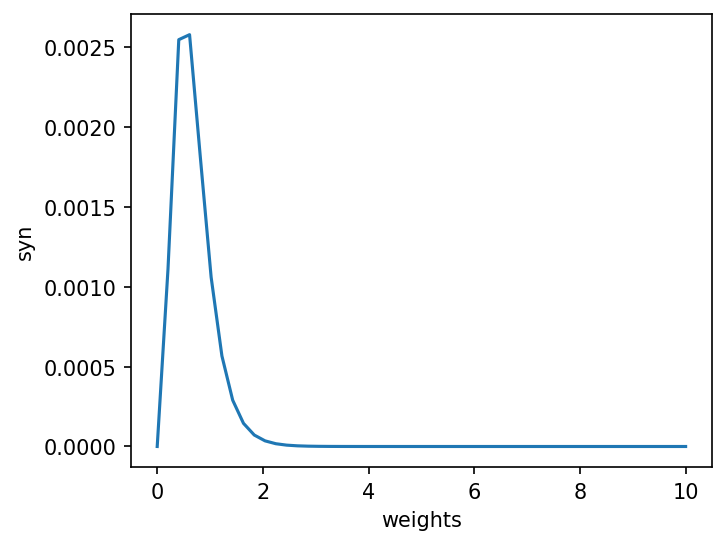

In [32]:
k = 1

ww = {
    'w_ab': 0,
    'w_ba': 0,
    'w_ac': 0,
    'w_ca': 0,
    'w_bc': 0,
    'w_cb': 0,
    'w_a': 0,
    'w_b': 0,
    'w_c': 0,
    'w11': -0.5,
    'w12': -0.5,
    'w13': -0.5,
    'w21': -0.5,
    'w22': -0.5,
    'w23': -0.5
}

bnet = {
    ('A', 'B'): 'w_ab',
    ('B', 'A'): 'w_ba',
    ('A', 'C'): 'w_ac',
    ('C', 'A'): 'w_ca',
    ('B', 'C'): 'w_bc',
    ('C', 'B'): 'w_cb',
    ('A', 'A'): 'w_a',
    ('B', 'B'): 'w_b',
    ('C', 'C'): 'w_c',
    ('E1', 'A'): 'w11',
    ('E1', 'B'): 'w12',
    ('E1', 'C'): 'w13',
    ('E2', 'A'): 'w21',
    ('E2', 'B'): 'w22',
    ('E2', 'C'): 'w23',
}

syn_list = []
w_axis = np.linspace(0, 10, 50)
for w in w_axis:
    ww['w_ab'] = w
    ww['w_bc'] = w
    ww['w_ca'] = w

    tpm, tpm_v = make_tpm(bnet, ww, k=k)
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm_v, mech_size=3, en_size=2) 
    syn_list.append(syn)
    
plt.figure(figsize=(5,4),dpi=150)
plt.plot(w_axis, syn_list)
plt.xlabel('weights')
plt.ylabel('syn')
#un_sys, un_en, syn = serie_plot(bnet, w, k, steps, seeds=1)

# 同时调节k和w

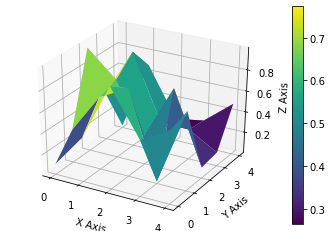

In [33]:


# 创建一个新的figure
fig = plt.figure()

# 添加一个3D坐标轴
ax = fig.add_subplot(111, projection='3d')

# 创建一个二维数组，例如一个5x5的随机数组
data = np.random.rand(5, 5)

# 为了在3D图中展示这个二维数组，我们需要创建X, Y坐标网格
x = np.arange(data.shape[0])
y = np.arange(data.shape[1])
X, Y = np.meshgrid(x, y)

# 将二维数组的值作为Z坐标
Z = data

# 绘制3D曲面图
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# 添加颜色条
fig.colorbar(surf)

# 设置坐标轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 显示图形
plt.show()

# 梯径分析序列

In [3]:
import string

# 获取所有小写字母
lowercase_letters = list(string.ascii_lowercase)

# 获取所有大写字母
uppercase_letters = list(string.ascii_uppercase)

# 合并两个列表
all_letters = lowercase_letters + uppercase_letters



In [7]:
lens = 2000
init_state = '00111'
tpm1, tpm_v1 = make_tpm(bnet, w1, k=1)
for seed in range(3):
    serie, _ = tpm_series(tpm_v1, init_state, lens, seed)
    letter_list = [all_letters[i] for i in serie]
    with open('w1_'+init_state+'_'+str(seed)+'.txt', 'w') as f:
            f.write(''.join(letter_list))


In [8]:

tpm2, tpm_v2 = make_tpm(bnet, w2, k=1)
for seed in range(3):
    serie, _ = tpm_series(tpm_v2, init_state, lens, seed)
    letter_list = [all_letters[i] for i in serie]
    with open('w2_'+init_state+'_'+str(seed)+'.txt', 'w') as f:
            f.write(''.join(letter_list))